In [12]:
# Importando bibliotecas que vão ser utilizadadas para a visualização dos dados para analisar a composição e correlação entre eles
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [13]:
# Lendo o arquivo tratado e reduzido anteriormente
df = pd.read_csv('DATABASE/base-reduzida-v3.csv', sep=',', encoding='utf-8', index_col=0)

In [14]:
# Visualizando o cabeçalho e alguns dados do dicionário
df.head()

,UF,Diagnóstico Depressão,Estado de Saúde,Pouco Interesse,Sentimento Depressivo,Sentimento de Fracasso,Ideação Suicida,Consumo Álcool,Dias Álcool,Quantidade Bebida,...,Motivo Não Visita,Toma Medicamentos,Último Atendimento,Compareceu Consulta,Limitação Atividade,Sexo,Cor Raça,Estado de Saúde Geral,Motivo Impedimento,Idade
57,11,2.0,1.0,1.0,1.0,1.0,1.0,2.0,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,NaN,36.0
59,11,2.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,54.0
61,11,2.0,1.0,1.0,1.0,1.0,1.0,2.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,51.0
65,11,2.0,1.0,1.0,1.0,1.0,1.0,2.0,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,2.0,4.0,1.0,NaN,24.0
94,11,2.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,4.0,1.0,NaN,65.0


In [15]:
df.shape

(16776, 24)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16776 entries, 57 to 293718
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UF                      16776 non-null  int64  
 1   Diagnóstico Depressão   16776 non-null  float64
 2   Estado de Saúde         16776 non-null  float64
 3   Pouco Interesse         16776 non-null  float64
 4   Sentimento Depressivo   16776 non-null  float64
 5   Sentimento de Fracasso  16776 non-null  float64
 6   Ideação Suicida         16776 non-null  float64
 7   Consumo Álcool          16776 non-null  float64
 8   Dias Álcool             1776 non-null   float64
 9   Quantidade Bebida       4401 non-null   float64
 10  Faltas por Bebida       4401 non-null   float64
 11  Dirigir Embriagado      2520 non-null   float64
 12  Idade Diagnóstico       8332 non-null   float64
 13  Visita Regular          8332 non-null   float64
 14  Motivo Não Visita       5309 non-nul

In [9]:
# Embaralhar o DataFrame com base na semente
df = df.sample(frac=1, random_state=77)

C:\Users\r3hab\AppData\Local\Temp\ipykernel_25960\4092799247.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), vmin=-1, vmax=+1, annot=False, cmap='YlGnBu', linewidths=0, ax=ax)


<AxesSubplot: >

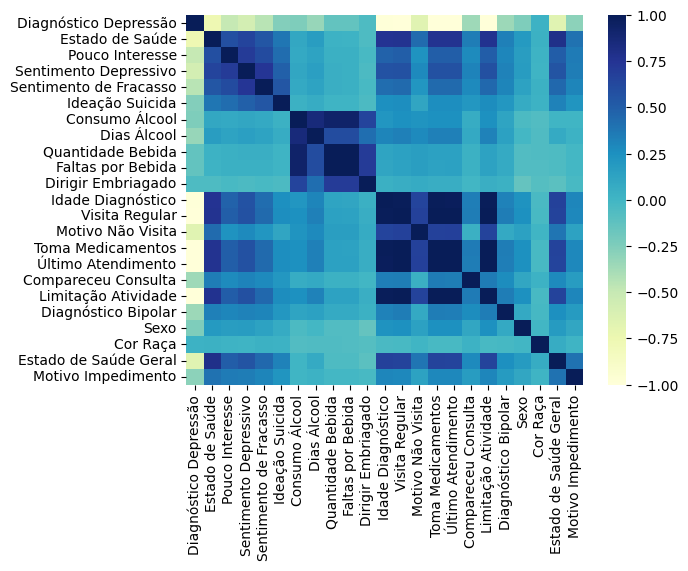

In [10]:
# Verificando como é a correlação das colunas do dataframe através de um heatmap
fig, ax = plt.subplots()
sns.heatmap(df.corr(), vmin=-1, vmax=+1, annot=False, cmap='YlGnBu', linewidths=0, ax=ax)

In [11]:
df

,UF,Diagnóstico Depressão,Estado de Saúde,Pouco Interesse,Sentimento Depressivo,Sentimento de Fracasso,Ideação Suicida,Consumo Álcool,Dias Álcool,Quantidade Bebida,...,Motivo Não Visita,Toma Medicamentos,Último Atendimento,Compareceu Consulta,Limitação Atividade,Diagnóstico Bipolar,Sexo,Cor Raça,Estado de Saúde Geral,Motivo Impedimento
224986,35,2,1,1,1,1,1,2,-99,1,...,-99,-99,-99,-99,-99,-99,1,1,2,4
207143,33,2,1,1,1,1,1,1,-99,-99,...,-99,-99,-99,-99,-99,-99,2,4,1,-99
154715,28,2,1,1,1,1,1,2,-99,3,...,-99,-99,-99,-99,-99,-99,2,2,1,-99
108952,24,1,4,4,4,4,1,1,-99,-99,...,-99,1,1,1,5,1,2,4,4,12
274169,51,2,1,1,1,1,1,1,-99,-99,...,-99,-99,-99,-99,-99,-99,1,2,1,-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134933,26,2,1,1,1,1,1,1,-99,-99,...,-99,-99,-99,-99,-99,-99,1,1,1,-99
173374,31,1,5,2,3,2,3,1,-99,-99,...,-99,1,1,-99,2,2,2,4,4,1
218276,35,1,2,2,2,2,1,1,-99,-99,...,1,2,5,-99,1,-99,2,4,2,6
118871,25,1,1,1,1,1,1,2,-99,3,...,1,2,4,1,1,-99,1,4,3,-99


kmeans.fit(df.drop('Private',axis=1))


In [12]:
# Pessoas que tiveram diagnóstico de depressão: 1.0, Pessoas que não tiveram: 2.0, Ignorado: 3.0
counts = df['Diagnóstico Depressão'].value_counts()
counts

1    8332
2    6744
Name: Diagnóstico Depressão, dtype: int64

In [13]:
# Aplicação da Técninca de Decision Tree

<AxesSubplot: xlabel='Diagnóstico Depressão', ylabel='count'>

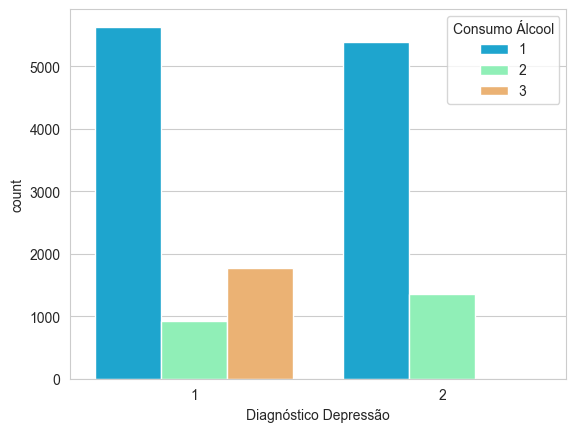

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='Diagnóstico Depressão',hue='Consumo Álcool',data=df,palette='rainbow')

<AxesSubplot: xlabel='Diagnóstico Depressão', ylabel='count'>

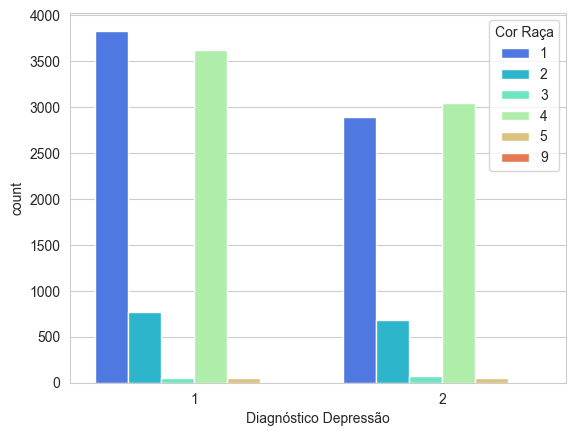

In [15]:

sns.set_style('whitegrid')
sns.countplot(x='Diagnóstico Depressão',hue='Cor Raça',data=df,palette='rainbow')

<AxesSubplot: xlabel='Diagnóstico Depressão', ylabel='count'>

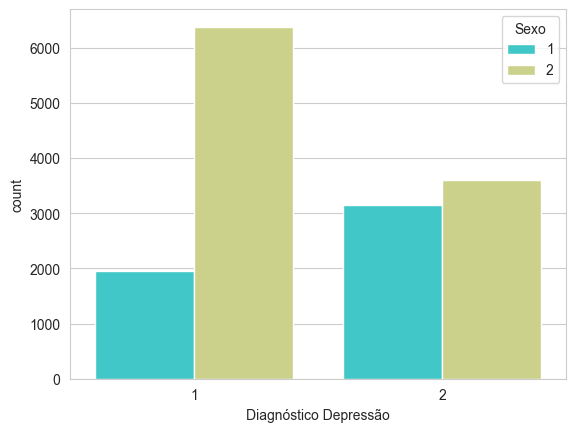

In [16]:

sns.set_style('whitegrid')
sns.countplot(x='Diagnóstico Depressão',hue='Sexo',data=df,palette='rainbow')

In [17]:
#sns.pairplot(df,hue='Diagnóstico Depressão',palette='Set1')

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [19]:
X = df.drop([ 'Consumo Álcool'], axis=1)  
y = df['Consumo Álcool'] 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [21]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
predictions = dtree.predict(X_test)


In [23]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [24]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3286
           2       1.00      1.00      1.00       690
           3       1.00      1.00      1.00       547

    accuracy                           1.00      4523
   macro avg       1.00      1.00      1.00      4523
weighted avg       1.00      1.00      1.00      4523



In [25]:
accuracy = accuracy_score(y_test, predictions)
print('Acurácia:', accuracy)

Acurácia: 1.0
